<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Size                     100 non-null    int64  
 1   Location                 100 non-null    object 
 2   Number of Rooms          100 non-null    int64  
 3   Year Built               100 non-null    int64  
 4   Distance to City Center  100 non-null    float64
 5   Price                    100 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 4.8+ KB
None
              Size  Number of Rooms   Year Built  Distance to City Center  \
count   100.000000       100.000000   100.000000               100.000000   
mean   1860.640000         2.850000  2000.970000                16.621800   
std     700.582233         1.438117    12.407602                 8.139917   
min     621.000000         1.000000  1980.000000                 1.650000   
25%    1335.7

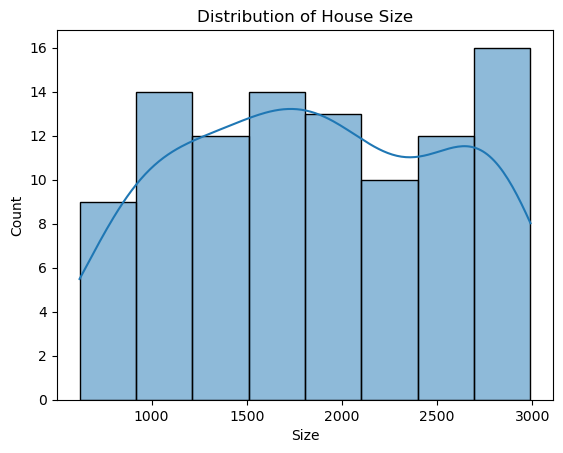

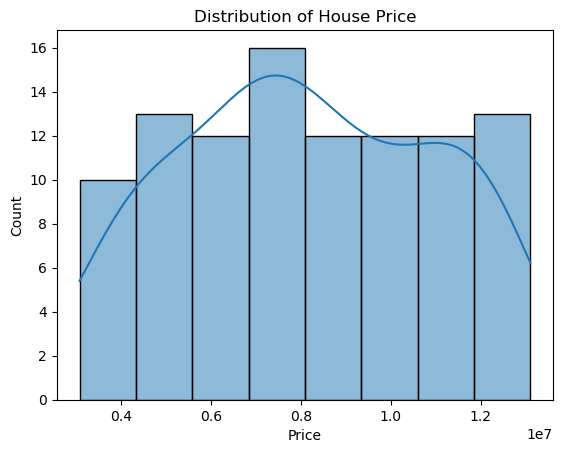

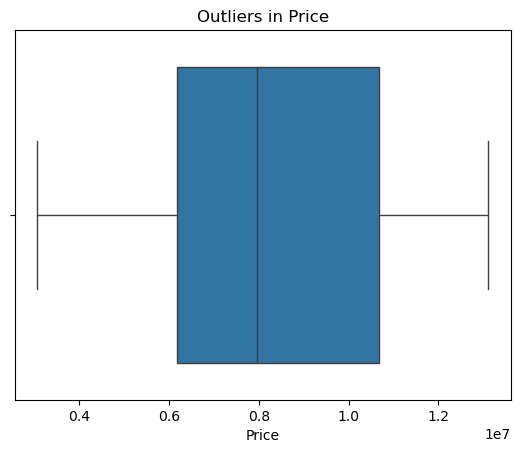

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('house_prices.csv')

# Basic inspection
print(df.info())
print(df.describe())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Distribution plots
sns.histplot(df['Size'], kde=True)
plt.title("Distribution of House Size")
plt.show()

sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Price")
plt.show()

# Outlier boxplots
sns.boxplot(x=df['Price'])
plt.title("Outliers in Price")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = df[['Size', 'Location', 'Number of Rooms', 'Year Built', 'Distance to City Center']]
y = df['Price']

# Column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), ['Size', 'Number of Rooms', 'Year Built', 'Distance to City Center']),
    ('cat', OneHotEncoder(drop='first'), ['Location'])  # drop='first' avoids dummy trap
])

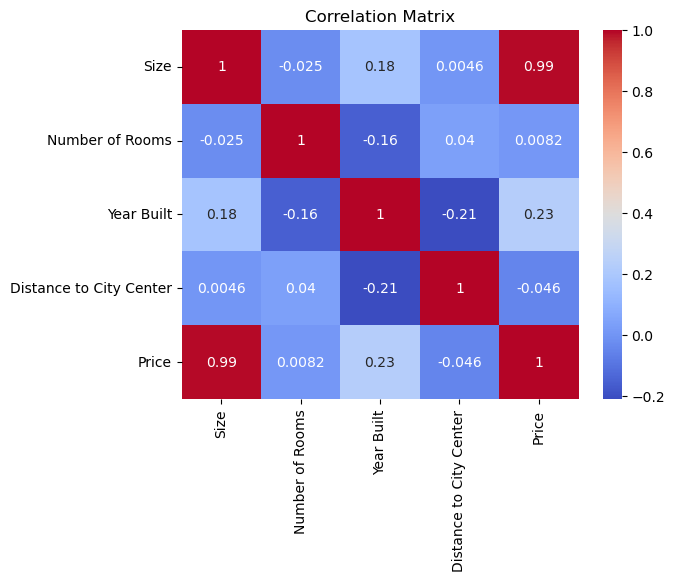

In [5]:
# Correlation matrix (numerical only)
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Size', 'Number of Rooms',
                                                   'Year Built',
                                                   'Distance to City Center']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Square Error (RMSE): {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

Root Mean Square Error (RMSE): 176,670.84
R² Score: 0.9940


In [8]:
# Extract feature names after encoding
ohe = model.named_steps['preprocessor'].named_transformers_['cat']
cat_features = list(ohe.get_feature_names_out(['Location']))
all_features = ['Size', 'Number of Rooms', 'Year Built', 'Distance to City Center'] + cat_features

# Coefficients
coefficients = model.named_steps['regressor'].coef_

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                   Feature   Coefficient
0                     Size  9.340814e+06
5           Location_Urban  5.911841e+05
2               Year Built  4.812348e+05
1          Number of Rooms  3.896117e+05
4        Location_Suburban  2.102873e+05
3  Distance to City Center -3.152940e+05
